In [93]:
import gzip, pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.metrics import accuracy_score

with gzip.open('mnist_rowmajor.pkl.gz', 'rb') as data_fh:
    data = pickle.load(data_fh, encoding='latin1')

train_images = data['images_train']
train_labels = data['labels_train']

images_train, images_dev, labels_train, labels_dev = train_test_split(train_images, train_labels, test_size=0.20, random_state=4)
images_test = data['images_test']
labels_test = data['labels_test']

TRAIN_LENGTH = len(images_train)
DEV_LENGTH = len(images_dev)
TEST_LENGTH = len(images_test)

# print(len(images_train))
# print(len(images_dev))
# print(len(labels_train))
# print(len(labels_dev))
# print(len(images_test))
# print(len(labels_test))

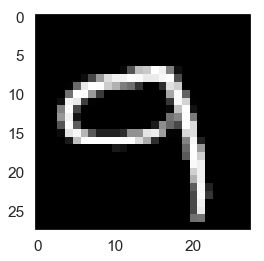

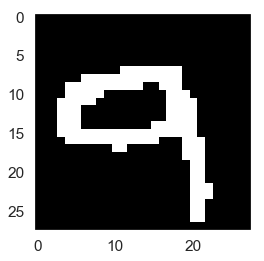

In [94]:
# *************** Question 4 ***************
# signing images_train and images_dev to 0 OR 1

signed_images_train = np.empty((TRAIN_LENGTH, 784))
for idx, i in enumerate(images_train):
    signed_image_train = list(map((lambda x: 1 if (x > 0) else 0), i))
    signed_images_train[idx] = signed_image_train

signed_images_dev = np.empty((DEV_LENGTH, 784))
for idx, i in enumerate(images_dev):
    signed_image_dev = list(map((lambda x: 1 if (x > 0) else 0), i))
    signed_images_dev[idx] = signed_image_dev

# Displaying just (any) one unsigned image out of all images_train
imgplot = plt.imshow(np.array(images_train[7]).reshape(28, 28), cmap='Greys_r')
plt.grid(False)
plt.show()

# Displaying just (any) one signed image out of all images_train
signed_image_train = list(map((lambda x: 1 if (x > 0) else 0), images_train[7]))
imgplot = plt.imshow(np.array(signed_image_train).reshape(28, 28), cmap='Greys_r')
plt.grid(False)
plt.show()


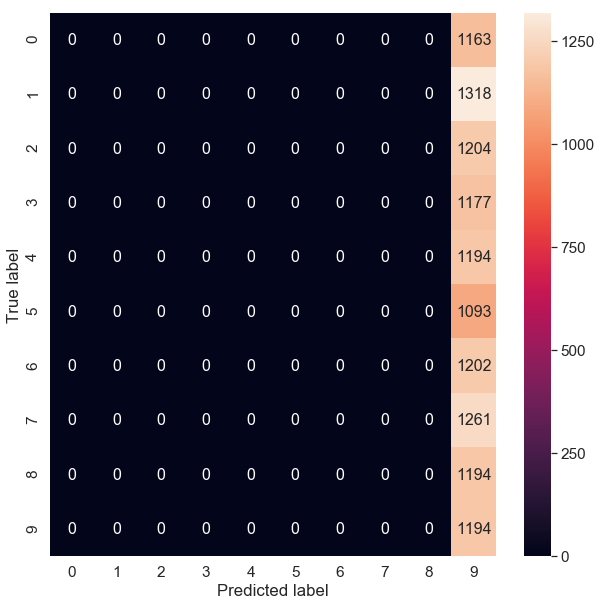

Accuracy:  0.0995
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1163
           1       0.00      0.00      0.00      1318
           2       0.00      0.00      0.00      1204
           3       0.00      0.00      0.00      1177
           4       0.00      0.00      0.00      1194
           5       0.00      0.00      0.00      1093
           6       0.00      0.00      0.00      1202
           7       0.00      0.00      0.00      1261
           8       0.00      0.00      0.00      1194
           9       0.10      1.00      0.18      1194

   micro avg       0.10      0.10      0.10     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.10      0.02     12000



In [95]:
# *************** Question 5 ***************
def most_frequent(array):
    max_occurance = 0
    element = array[0]
    for i in range(10):
        current_occurance = array.count(i)
        if(current_occurance > max_occurance):
            max_occurance = current_occurance
            element = i
    return np.full((DEV_LENGTH, 1), element)

y_pred_baseline = most_frequent(labels_train.tolist())

cm = confusion_matrix(labels_dev.flatten(), y_pred_baseline.flatten())
df_cm = pd.DataFrame(cm.astype(int), range(10), range(10))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
accuracy = accuracy_score(labels_dev.flatten(), y_pred_baseline.flatten())
print('Accuracy: ', accuracy)
print(classification_report(labels_dev.flatten(), y_pred_baseline.flatten()))



In [128]:
#*************** Question 6 (a) Standard Perceptron ***************
def train_standard_perceptron_model(images_train, labels_train, w, epoach):
    N = len(labels_train)
    for i in range(epoach):
        for j in range(len(images_train)):
    #         j = i % TRAIN_LENGTH
            activation_score = np.dot(w, images_train[j].T)
            y_carat = np.argmax(activation_score)
            if (y_carat == labels_train[j][0]):
                pass
            else:
                w[y_carat] = w[y_carat] - images_train[j]
                w[labels_train[j][0]] = w[labels_train[j][0]] + images_train[j]
    return w

def predictY(images_dev, labels_dev, w):
    N = len(labels_dev)
    y_pred = np.empty((DEV_LENGTH, 1))
    for j in range(N):
        activation_score = np.dot(w, images_dev[j].T)
        y_carat = np.argmax(activation_score)
        y_pred[j] = y_carat
    return y_pred

def predictYTest(images_test, labels_test, w):
    N = len(labels_test)
    y_pred = np.empty((N, 1))
    for j in range(N):
        activation_score = np.dot(w, images_test[j].T)
        y_carat = np.argmax(activation_score)
        y_pred[j] = y_carat
    return y_pred

def evaluate_model(actual_labels, pred_labels):
    cm = confusion_matrix(actual_labels.flatten(), pred_labels.flatten(), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    df_cm = pd.DataFrame(cm.astype(int), range(10), range(10))
    plt.figure(figsize = (10,10))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")# font size
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    accuracy = accuracy_score(actual_labels.flatten(), pred_labels.flatten())
    print('Accuracy: ', accuracy)
    print(classification_report(actual_labels.flatten(), pred_labels.flatten()))
    
def evaluate_error(actual_labels, pred_labels):
    accuracy = accuracy_score(actual_labels.flatten(), pred_labels.flatten())
    return (1 - accuracy)

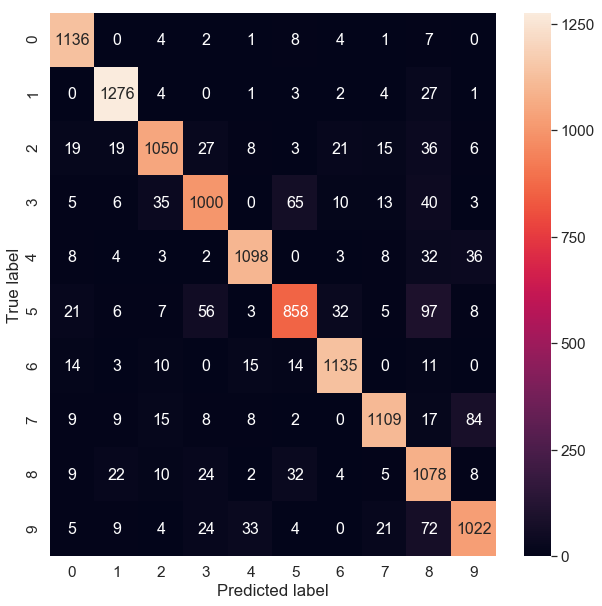

Accuracy:  0.8968333333333334
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1163
           1       0.94      0.97      0.96      1318
           2       0.92      0.87      0.90      1204
           3       0.87      0.85      0.86      1177
           4       0.94      0.92      0.93      1194
           5       0.87      0.78      0.82      1093
           6       0.94      0.94      0.94      1202
           7       0.94      0.88      0.91      1261
           8       0.76      0.90      0.83      1194
           9       0.88      0.86      0.87      1194

   micro avg       0.90      0.90      0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [153]:
# Evaluation for Standard Perceptron Question 6 configuration 1
w = np.zeros((10, 784), dtype='d')
w = train_standard_perceptron_model(images_train, labels_train, w, 3)
y_pred = predictY(images_dev, labels_dev, w)
evaluate_model(labels_dev, y_pred)

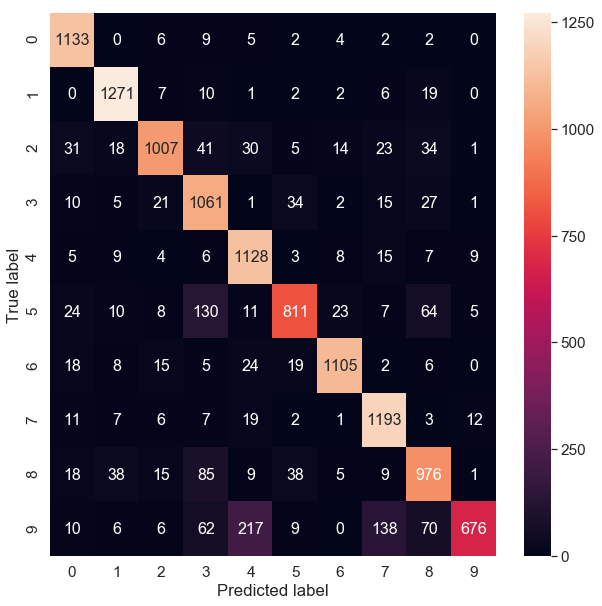

Accuracy:  0.8634166666666667
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1163
           1       0.93      0.96      0.94      1318
           2       0.92      0.84      0.88      1204
           3       0.75      0.90      0.82      1177
           4       0.78      0.94      0.85      1194
           5       0.88      0.74      0.80      1093
           6       0.95      0.92      0.93      1202
           7       0.85      0.95      0.89      1261
           8       0.81      0.82      0.81      1194
           9       0.96      0.57      0.71      1194

   micro avg       0.86      0.86      0.86     12000
   macro avg       0.87      0.86      0.86     12000
weighted avg       0.87      0.86      0.86     12000



In [154]:
# Evaluation for Signed Standard Perceptron Question 6 configuration 2
w = np.zeros((10, 784), dtype='d')
w = train_standard_perceptron_model(np.array(signed_images_train), labels_train, w, 3)
y_pred_signed = predictY(np.array(signed_images_dev), labels_dev, w)
evaluate_model(labels_dev, y_pred_signed)

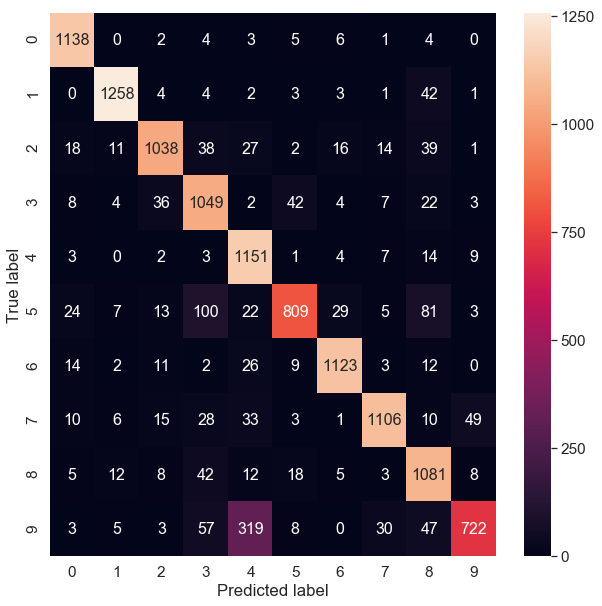

Accuracy:  0.8729166666666667
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1163
           1       0.96      0.95      0.96      1318
           2       0.92      0.86      0.89      1204
           3       0.79      0.89      0.84      1177
           4       0.72      0.96      0.82      1194
           5       0.90      0.74      0.81      1093
           6       0.94      0.93      0.94      1202
           7       0.94      0.88      0.91      1261
           8       0.80      0.91      0.85      1194
           9       0.91      0.60      0.73      1194

   micro avg       0.87      0.87      0.87     12000
   macro avg       0.88      0.87      0.87     12000
weighted avg       0.88      0.87      0.87     12000



In [145]:
# Evaluation for Biased Perceptron Question 6 configuration 3
biased_images_train = np.empty((TRAIN_LENGTH, 785))
for idx, image in enumerate(images_train):
    img = np.append(image, 1)
    biased_images_train[idx] = img
    
biased_images_dev = np.empty((DEV_LENGTH, 785))
for idx, image in enumerate(images_dev):
    img = np.append(image, 1)
    biased_images_dev[idx] = img

w_bias = np.zeros((10, 785), dtype='d')
w_bias = train_standard_perceptron_model(biased_images_train, labels_train, w_bias, 3)
y_pred_bias = predictY(biased_images_dev, labels_dev, w_bias)
evaluate_model(labels_dev, y_pred_bias)

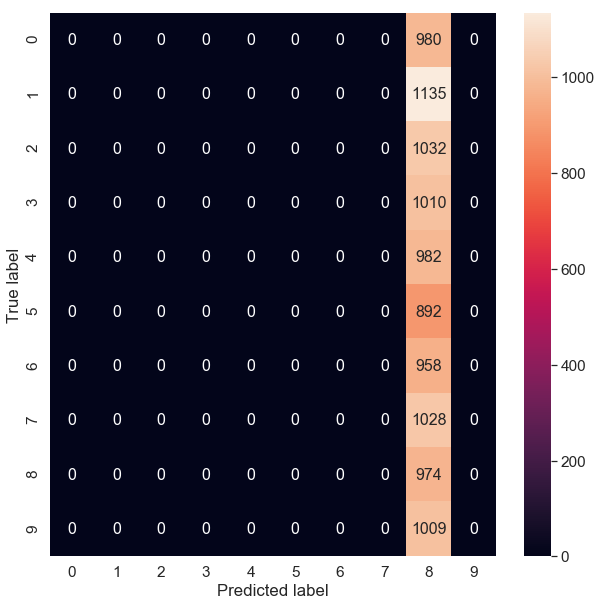

Accuracy:  0.0974
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.10      1.00      0.18       974
           9       0.00      0.00      0.00      1009

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



In [157]:
# Baseline for TEST Data
def most_frequent_test(array):
    max_occurance = 0
    element = array[0]
    for i in range(10):
        current_occurance = array.count(i)
        if(current_occurance > max_occurance):
            max_occurance = current_occurance
            element = i
    return np.full((TEST_LENGTH, 1), element)
evaluate_model(labels_test, most_frequent_test(labels_test.tolist()))

(10000, 1)


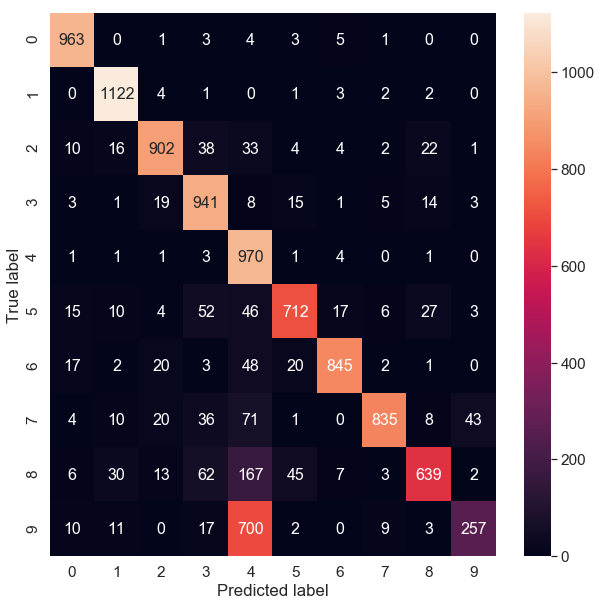

Accuracy:  0.8186
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.93      0.99      0.96      1135
           2       0.92      0.87      0.89      1032
           3       0.81      0.93      0.87      1010
           4       0.47      0.99      0.64       982
           5       0.89      0.80      0.84       892
           6       0.95      0.88      0.92       958
           7       0.97      0.81      0.88      1028
           8       0.89      0.66      0.76       974
           9       0.83      0.25      0.39      1009

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.86      0.82      0.81     10000
weighted avg       0.86      0.82      0.81     10000



In [105]:
#*************** Question 7 ***************

# Evaluation for Standard Perceptron with TEST Data
w = np.zeros((10, 784), dtype='d')
w = train_standard_perceptron_model(train_images, train_labels, w, 3)

# Test Standard Perceptron
y_pred_final = predictYTest(images_test, labels_test, w)
evaluate_model(labels_test, y_pred_final)

In [148]:
dictionary1 = {}
for k in range(1,51):
    w = np.zeros((10, 784), dtype='d')
    w = train_standard_perceptron_model(images_train, labels_train, w, k)
    y_pred = predictY(images_dev, labels_dev, w)
    dictionary1[k] = evaluate_error(labels_dev, y_pred)
    
dictionary2 = {}
for l in range(1,51):
    w = np.zeros((10, 784), dtype='d')
    w = train_standard_perceptron_model(np.array(signed_images_train), labels_train, w, l)
    y_pred_signed = predictY(np.array(signed_images_dev), labels_dev, w)
    dictionary2[l] = evaluate_error(labels_dev, y_pred_signed)
    
dictionary3 = {}
for m in range(1,51):
    w_bias = np.zeros((10, 785), dtype='d')
    w_bias = train_standard_perceptron_model(biased_images_train, labels_train, w_bias, m)
    y_pred_bias = predictY(biased_images_dev, labels_dev, w_bias)
    dictionary3[m] = evaluate_error(labels_dev, y_pred_bias)



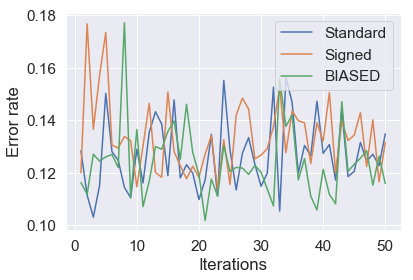

In [155]:

plt.xlabel('Iterations')
plt.ylabel('Error rate')
plt.plot(dictionary1.keys(), dictionary1.values())
plt.plot(dictionary2.keys(), dictionary2.values())
plt.plot(dictionary3.keys(), dictionary3.values())
plt.legend(('Standard', 'Signed', 'BIASED'))
plt.savefig('errors.png')